# MLflow Quickstart Assignment

Welcome! In this notebook, you'll get hands-on experience with MLflow, a tool for tracking machine learning experiments.

**Objective:** Run and track a simple experiment using MLflow in under 10 minutes.

## 1. Run a Simple Experiment

First, configure MLflow to use file-based storage, then train a simple model and log parameters and metrics.

In [17]:
# Set MLflow tracking to use file-based storage
import mlflow
import os

# Set tracking URI to the mlruns directory
tracking_uri = os.path.join(os.getcwd(), "mlruns")
mlflow.set_tracking_uri(f"file:///{tracking_uri}")

# Create the mlops_lecture experiment
mlflow.set_experiment("mlops_lecture")

print(f"MLflow tracking URI set to: {mlflow.get_tracking_uri()}")
print(f"Using experiment: {mlflow.get_experiment(mlflow.get_experiment_by_name('mlops_lecture').experiment_id).name}")

Traceback (most recent call last):
  File "c:\Users\plperez\Projets\mlops_lecture\.venv\Lib\site-packages\mlflow\store\tracking\file_store.py", line 379, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\plperez\Projets\mlops_lecture\.venv\Lib\site-packages\mlflow\store\tracking\file_store.py", line 477, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\plperez\Projets\mlops_lecture\.venv\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1662, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\plperez\Projets\mlops_lecture\.venv\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1655, in _read_helper
    result = read_ya

MLflow tracking URI set to: file:///c:\Users\plperez\Projets\mlops_lecture\mlruns
Using experiment: mlops_lecture


In [18]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy data
X, y = make_regression(n_samples=100, n_features=1, noise=10)

with mlflow.start_run():
    model = LinearRegression()
    model.fit(X, y)
    
    # Log parameters and metrics
    mlflow.log_param("fit_intercept", model.fit_intercept)
    mlflow.log_param("n_samples", 100)
    mlflow.log_param("noise", 10)
    mlflow.log_metric("score", model.score(X, y))
    
    # Create and log the regression plot
    slope = model.coef_[0]
    intercept = model.intercept_
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the actual data points
    ax.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
    
    # Create predictions for the regression line
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_line)
    
    # Plot the regression line
    ax.plot(X_line, y_pred, color='red', linewidth=2, label='Regression Line')
    
    # Add equation to the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.text(0.05, 0.95, equation_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    ax.set_title('Linear Regression: Data Points and Fitted Line')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Log the figure to MLflow
    mlflow.log_figure(fig, "regression_plot.png")
    plt.close(fig)
    
    # Log the model
    mlflow.sklearn.log_model(model, "model")
    
    print("Experiment logged!")
    print(f"Model R² Score: {model.score(X, y):.4f}")
    print(f"Equation: {equation_text}")

2026/02/06 20:02:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\plperez\Projets\mlops_lecture\.venv\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
2026/02/06 20:03:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


Experiment logged!
Model R² Score: 0.9928
Equation: y = 94.37x + -1.63


## 2 Visualize the Data and Model

Let's plot the data points and the regression line.

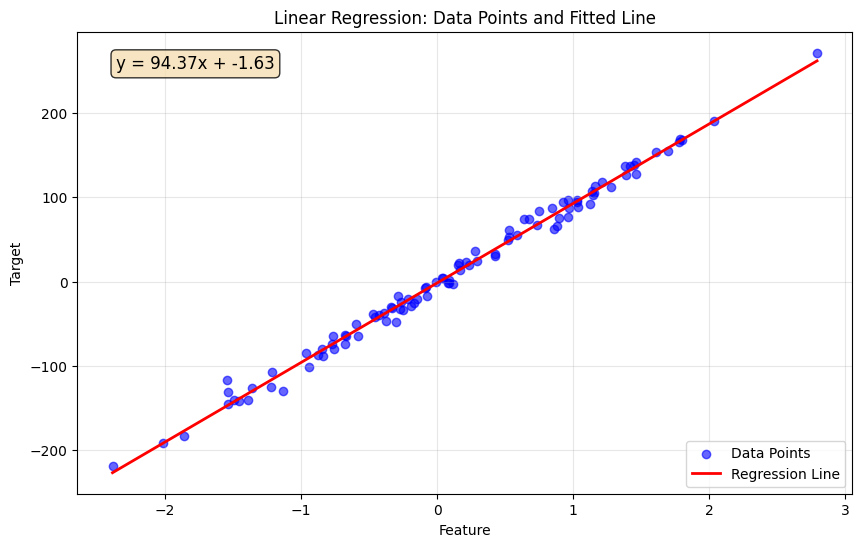

Model R² Score: 0.9928
Equation: y = 94.37x + -1.63


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')

# Create predictions for the regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_line)

# Plot the regression line
plt.plot(X_line, y_pred, color='red', linewidth=2, label='Regression Line')

# Add equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Data Points and Fitted Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Model R² Score: {model.score(X, y):.4f}")
print(f"Equation: {equation_text}")

## 3. View Experiment Results

Start the MLflow UI to view your experiment results.

**Note:** If you don't see experiments in the UI, make sure you've run cell 2 (MLflow configuration) before running the experiment cell above. If needed, re-run the experiment cell after setting the tracking URI.

In [20]:
import subprocess
import time
import os

# Get the full path to mlruns directory
mlruns_path = os.path.join(os.getcwd(), "mlruns")

print("To view MLflow UI, run this command in a separate terminal:")
print(f"  mlflow ui --port 5000 --backend-store-uri {mlruns_path}")
print("\nAlternatively, running MLflow UI in background...")

# Try to start MLflow UI in background
try:
    # Start MLflow UI process
    process = subprocess.Popen(
        ["mlflow", "ui", "--port", "5000", "--backend-store-uri", mlruns_path],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        creationflags=subprocess.CREATE_NO_WINDOW if hasattr(subprocess, 'CREATE_NO_WINDOW') else 0
    )
    
    time.sleep(2)  # Wait for server to start
    
    # Check if process is running
    if process.poll() is None:
        print("✓ MLflow UI started successfully!")
        print("✓ Visit http://localhost:5000 to view your experiments")
        
        # Optionally open browser
        # webbrowser.open('http://localhost:5000')
    else:
        print("✗ Failed to start MLflow UI. Please run the command in terminal.")
except Exception as e:
    print(f"✗ Error starting MLflow UI: {e}")
    print(f"Please run 'mlflow ui --port 5000 --backend-store-uri {mlruns_path}' in a terminal.")

To view MLflow UI, run this command in a separate terminal:
  mlflow ui --port 5000 --backend-store-uri c:\Users\plperez\Projets\mlops_lecture\mlruns

Alternatively, running MLflow UI in background...
✓ MLflow UI started successfully!
✓ Visit http://localhost:5000 to view your experiments


## 4. Assignment Complete

You have logged an experiment and viewed it in MLflow UI!

**Congratulations!**